In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set_style("whitegrid")


In [ ]:
# loading dataset
df = pd.read_csv("C:/Users/Om/OneDrive/Documents/ML PRACTICE/PROJECTS/Heart_disease_prediction project/data/heart_disease_dataset.csv")

In [4]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [ ]:
# checking for null values
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64

In [ ]:
# statistics of the dataset
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,53.667500,0.662500,1.712500,123.630000,216.627500,0.140000,0.530000,146.717500,0.29250,0.753250,1.177500,0.677500,1.925000,0.555000
std,8.508403,0.473449,1.035628,16.567114,41.379941,0.347422,0.533678,21.104293,0.45548,0.772841,0.645784,0.889084,0.689611,0.497588
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,91.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,112.000000,188.000000,0.000000,0.000000,132.000000,0.00000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,2.000000,124.000000,216.000000,0.000000,1.000000,146.000000,0.00000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,3.000000,135.000000,246.000000,0.000000,1.000000,161.000000,1.00000,0.900000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,174.000000,336.000000,1.000000,2.000000,202.000000,1.00000,4.900000,2.000000,3.000000,3.000000,1.000000


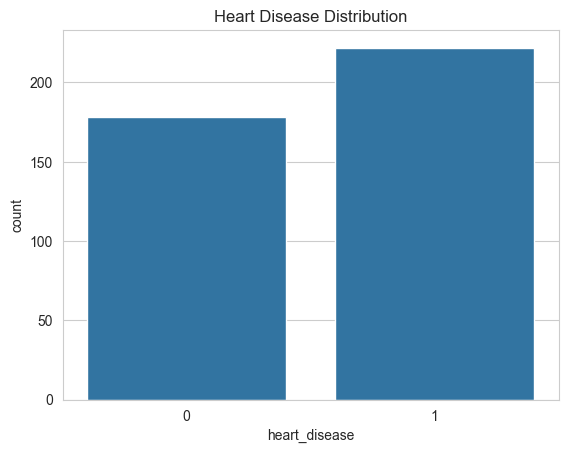

In [8]:
# checking target distribution 
df['heart_disease'].value_counts()

sns.countplot(x='heart_disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()
# we can see they are roughly balanced

In [9]:
print(df["heart_disease"].value_counts())

heart_disease
1    222
0    178
Name: count, dtype: int64


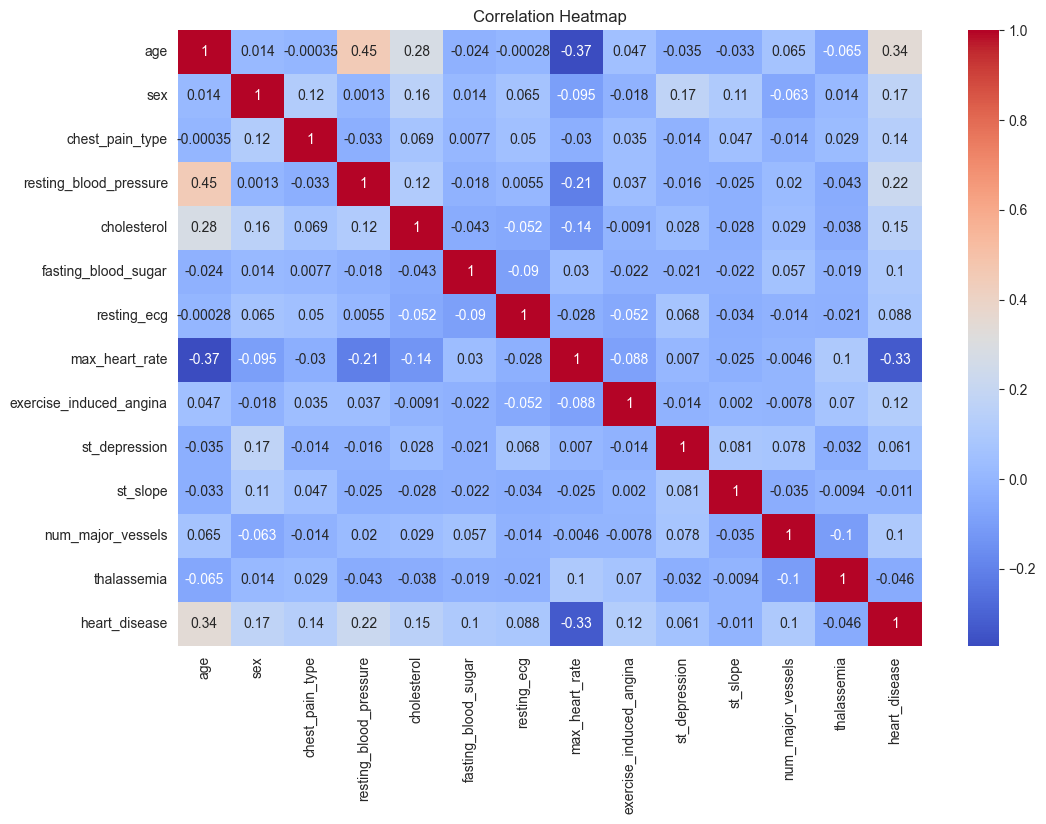

In [11]:
# checking correlation 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Train test split

In [12]:
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

In [16]:
print(X)


     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     58    1                1                     134          246   
1     52    0                2                     112          245   
2     59    0                2                     126          196   
3     67    1                1                     165          201   
4     51    1                0                     146          174   
..   ...  ...              ...                     ...          ...   
395   49    1                1                     133          178   
396   38    1                3                     111          126   
397   66    1                1                     136          205   
398   52    1                3                     144          208   
399   65    0                1                     139          178   

     fasting_blood_sugar  resting_ecg  max_heart_rate  \
0                      0            0             155   
1                      0         

In [17]:
print(y)

0      1
1      1
2      1
3      0
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: heart_disease, Length: 400, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (320, 13)
Testing size: (80, 13)


# Logistic Regression

In [20]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred_log = log_model.predict(X_test)

In [22]:
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        34
           1       0.79      0.67      0.73        46

    accuracy                           0.71        80
   macro avg       0.71      0.72      0.71        80
weighted avg       0.73      0.71      0.71        80



In [23]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))

ROC-AUC: 0.7193094629156009


### Logistic Regression provides moderate performance with ROC-AUC of 0.72. While precision is high (0.79), recall for heart disease detection is 0.67, indicating that some positive cases are missed. Therefore, more complex models will be explored to improve sensitivity.

# Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_dt = dt_model.predict(X_test)

In [26]:
print("Decision Tree Results")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        34
           1       0.60      0.63      0.62        46

    accuracy                           0.55        80
   macro avg       0.54      0.54      0.54        80
weighted avg       0.55      0.55      0.55        80



In [27]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))

ROC-AUC: 0.5358056265984655


### The Decision Tree model underperformed compared to Logistic Regression, achieving a ROC-AUC of 0.53. This suggests high variance and instability, likely due to overfitting on training data.

# Random Forest

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        34
           1       0.67      0.70      0.68        46

    accuracy                           0.62        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.62      0.62      0.62        80



In [31]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

ROC-AUC: 0.6125319693094629


### Recall improved:
### Logistic Regression → 0.67
### Decision Tree → 0.63
### Random Forest → 0.70 

### So Random Forest detects more actual heart disease patients.

### But ROC-AUC is still lower than Logistic Regression (0.72).

# SVM

In [32]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [33]:
y_pred_svm = svm_model.predict(X_test)

In [34]:
print("SVM Results")
print(classification_report(y_test, y_pred_svm))

SVM Results
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        34
           1       0.63      0.63      0.63        46

    accuracy                           0.57        80
   macro avg       0.57      0.57      0.57        80
weighted avg       0.57      0.57      0.57        80



In [35]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))

ROC-AUC: 0.5652173913043479


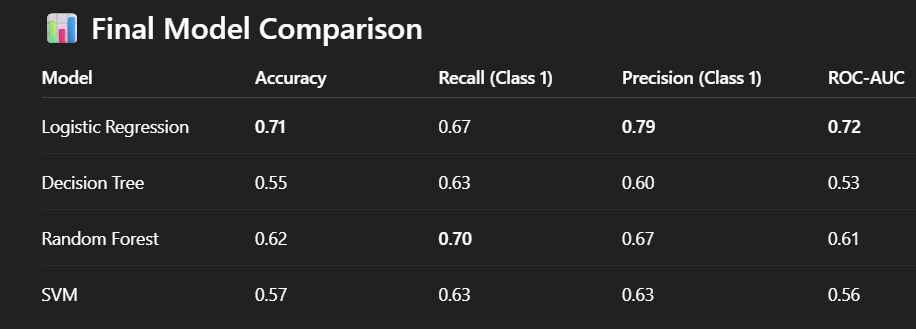

### Among the evaluated models, Random Forest achieved the highest recall (0.70) for heart disease detection, making it more suitable for medical diagnosis where minimizing false negatives is critical. Although Logistic Regression achieved slightly higher ROC-AUC (0.72), Random Forest provides better sensitivity, which is prioritized in healthcare applications.

# Finalizing Random Forest model

In [36]:
X_full = df.drop("heart_disease", axis=1)
y_full = df["heart_disease"]

final_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

final_model.fit(X_full, y_full)

print("Final Random Forest Model Trained on Full Dataset")


Final Random Forest Model Trained on Full Dataset


In [37]:
# save model 
import joblib

joblib.dump(final_model, "../model/heart_disease_model.pkl")

print("Model saved successfully!")


Model saved successfully!
